##### _Data Visualization with Python_
---

# Scatter Plot with a Regression Line (Regression Plot)


A scatter plot with a trendline/regression line (often called a regression plot) is a scatter plot that includes an additional line representing the "best fit" relationship between the two variables. This line is typically calculated using a regression method, most commonly linear regression.

### Suitable Variable Types
* **X-axis (Independent Variable):** Numerical (interval or ratio).
* **Y-axis (Dependent Variable):** Numerical (interval or ratio).

### Use Cases
1. **Visualizing the Relationship:** Shows the relationship (positive, negative, or none) between the two variables, just like a basic scatter plot.
2. **Quantifying the Relationship:** The trendline provides a mathematical equation that describes the relationship. For linear regression, this is the equation of a straight line (y = mx + b).
3. **Making Predictions:** The trendline can be used to predict the value of the dependent variable (y) for a given value of the independent variable (x), *within the range of the observed data* (interpolation).
4. **Highlighting the Strength of Relationship:** Visualizing how close data is to the trendline.
5. **Identifying Outliers:**

### Potential Pitfalls
1. **All Scatter Plot Pitfalls:** All the pitfalls of a basic scatter plot (overplotting, correlation vs. causation, etc.) still apply.
2. **Overfitting:** A complex trendline (e.g., a high-degree polynomial) can overfit the data, meaning it follows the noise in the data rather than the true underlying relationship.  Choose the simplest model that adequately represents the relationship.
3. **Non-Linear Relationships:** If the relationship between the variables is non-linear, a straight line (linear regression) will be a poor fit.  Consider using a non-linear regression model or transforming the variables.
4. **Extrapolation:**  *Never* use the trendline to make predictions *outside* the range of the observed x-values. The relationship might not hold true beyond the data you have.
5. **Influential Points:** Be aware that the regression is not robust, a few points can dramatically change the line.

### How to Create Regression Plots?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np

# --- Synthetic Data: Study Hours vs. Exam Score ---
np.random.seed(42)
n = 50  # Number of students
study_hours = np.random.randint(1, 21, size=n)  # Study hours between 1 and 20
# Exam scores with a positive correlation to study hours, plus some random variation
exam_scores = 50 + 2 * study_hours + np.random.randn(n) * 5
df_study = pd.DataFrame({'Study Hours': study_hours, 'Exam Score': exam_scores})
df_study['Exam Score'] = df_study['Exam Score'].clip(0, 100)

df_study.head()

,Study Hours,Exam Score
0,7,57.674404
1,20,95.459961
2,15,93.891565
3,11,77.968199
4,8,67.093192


#### Regression Plot with Matplotlib:

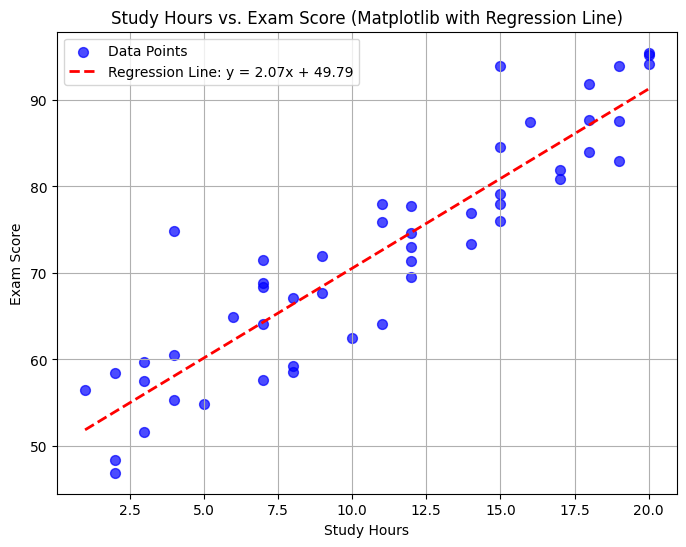

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- Matplotlib (with manual regression line calculation) ---
plt.figure(figsize=(8, 6))
plt.scatter(x=df_study['Study Hours'], y=df_study['Exam Score'], marker='o', s=50, alpha=0.7, color='blue', label='Data Points')

# Calculate the regression line (using NumPy)
m, b = np.polyfit(df_study['Study Hours'], df_study['Exam Score'], 1)  # 1st-degree polynomial (linear)
x_line = np.array([df_study['Study Hours'].min(), df_study['Study Hours'].max()])
y_line = m * x_line + b

plt.plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')

plt.title('Study Hours vs. Exam Score (Matplotlib with Regression Line)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.legend()
plt.show()

#### Regression Plot with Seaborn:

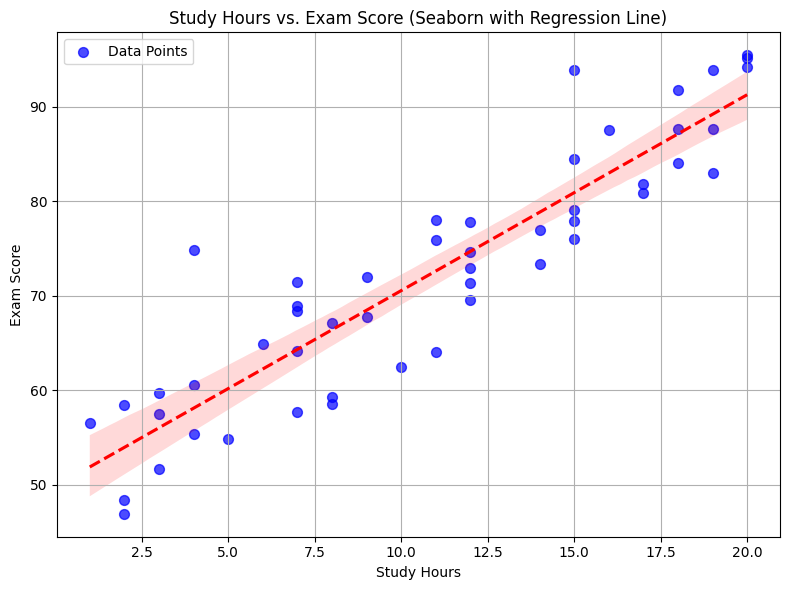

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Seaborn (using regplot) ---
plt.figure(figsize=(8, 6))
sns.regplot(x='Study Hours', y='Exam Score', data=df_study,
            scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'blue'},
            line_kws={'color': 'red', 'linestyle': '--'}, label = "Data Points")

plt.title('Study Hours vs. Exam Score (Seaborn with Regression Line)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()